# 퍼셉트론
- 인공신경망(artificial neural network, 신경망)
- 맨 처음 시작은 '켜고 끄는 기능이 있는 신경'을 그물망 형태로 연결하면 사람의 뇌처럼 동작할 수 있다는 가능성을 처음 주장한 논문
- 그 이후 이 개념을 실제 장치로 만들어 선보였고, 이를 퍼셉트론 이라 함


### 인공지능의 시작
- 입력 값을 여러개 받아 출력을 만드는데, 이때 입력 갑셍 가중치를 조절할 수 있게 만들어 최초로 '학습'이 가능하게 함
- 이후, 경사 하강법을 도입해 최적의 경계선을 그릴 수 있게 한 '아달라인'
- 아달라인은 이후 서포트 벡터 머신(Support Vector Machine)등 머신러닝의 중요 알고리즘으로 발전하는데, 이 중 시그모이드 활성화 함수로 사용한 것이 '로지스틱회귀'

### 과제
- 퍼셉트론의 한계가 무엇인지 알고 이를 극복하는 과정 -> 딥러닝

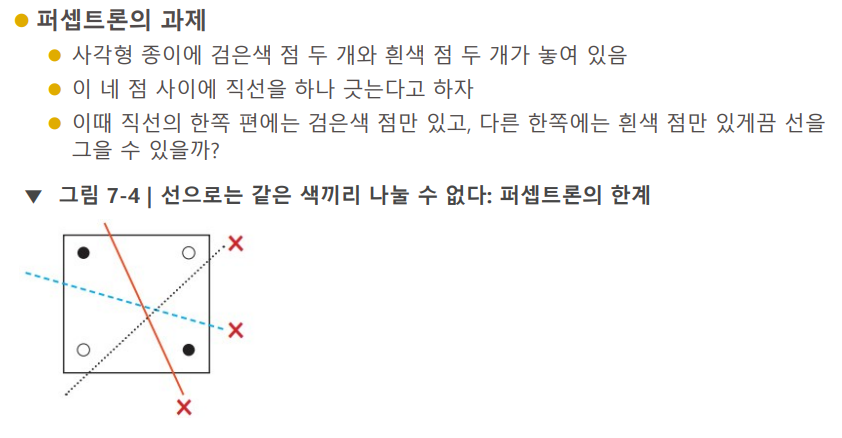

- 선을 여러 개 그어봐도 하나의 직선으로는 구분 불가
(선을 아무리 그어도 해결되지 않는 상황이 있음)

#### XOR문제
- 퍼셉트론의 한계를 설명할 때 등장하는 XOR(eXclusive OR)문제


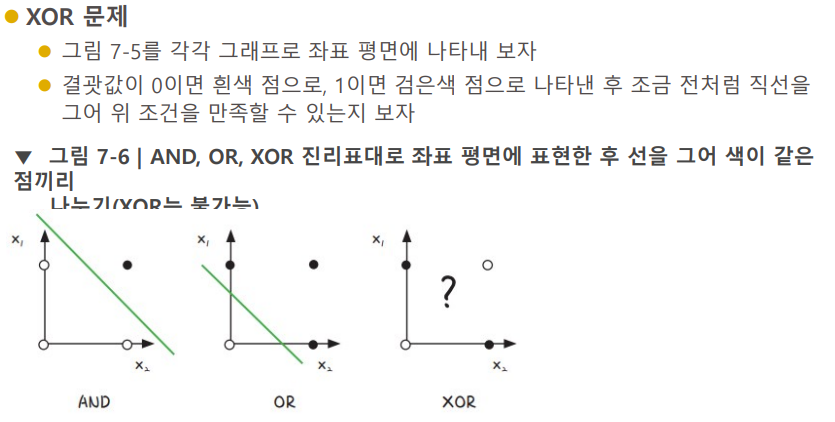


- AND와 OR 게이트는 직선을 그어 결과값이 1인 값(검은 점)구별 가능
- XOR은 선을 구어 구분할 수 없음
- 이 문제는 다층 퍼셉트론(multilayer perceptron), 오차 역전파(back propagation)이 순차 개발되며 해결됨

# 다층 퍼셉트론

## 등장
- 인공 신경망을 개발하기 위해서는 반드시 XOR 문제를 극복해야 했음

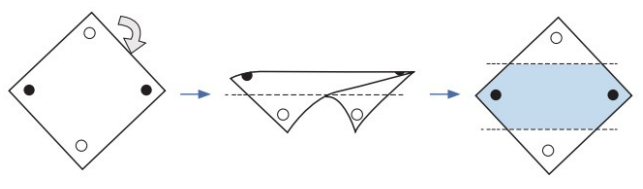
- 종이를 휘어 선 두개를 동시에 긋는 법
- 즉 XOR 문제에 적용하면 '퍼셉트론 두 개를 한번에 계산'
- 퍼셉트론 두 개를 각각 처리하는 '은닉층'을 만듬

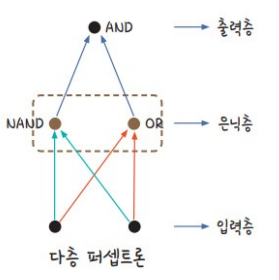

## 설계
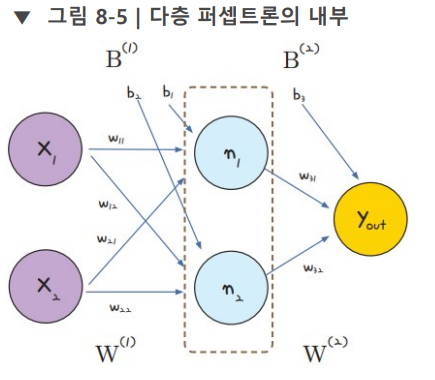
- 가운데 점선이 은닉층
- x1과 x2는 입력값, 각 값에 가중치(w)를 곱하고 바이어스(b)를 더해 은닉층으로 전송
- n1, n2는 해당 값들이 모이는 은닉층의 중간 정거장, 노드
- 은닉층의 값들은 활성화 함수를 통해 출력층의 방향으로 보내지고, 출력층으로 전달된 값은 마찬가지로 활성화 함수를 사용해 y 예측 값을 정하게 됨
<br>
<br>
- 가중치(w)와 바이어스(b) 값을 정할 차례
- 은닉층을 포함해 가중치 여섯 개와 바이어스 세 개가 필요함
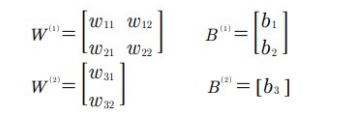

## XOR 문제의 해결
- 가중치와 바이어스 값을 정하고 이를 통해 XOR 문제를 해결해봄

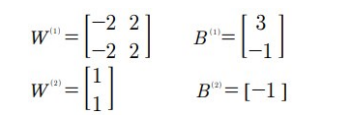

- 이를 이용해 그림에 대입
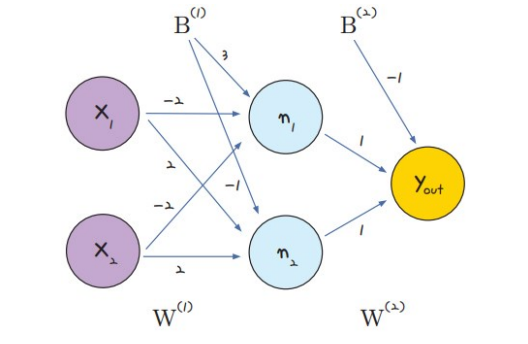

- 값이 제대로 나오는지 확인
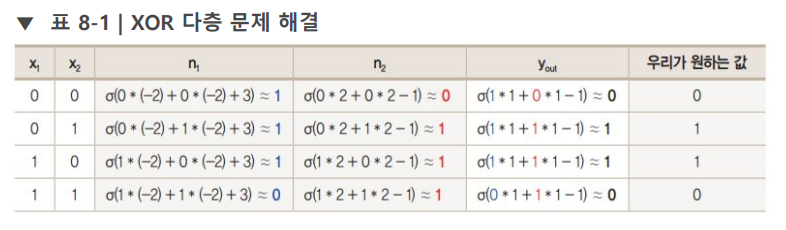

- 숨어 있는 노드 2개를 다룬 다층 퍼셉트론을 통해 XOR 문제 해결됨


### 여전한 문제
- 다층 퍼셉트론을 사용할 경우 XOR 문제는 해결되었으나, 은닉층에 들어있는 가충치를 데이터를 통해 학습하는 방법이 없었음
- 적절한 학습법을 찾기까지 약 20년여 시간이 걸림
- 최적화된 예측선을 잘 그려주던 아달라인을 발전시켜 SVM이나 로지스틱 회귀 모델 그룹을 만든 그룹과, 다층 퍼셉트론의 학습 방법을 찾던 그룹으로 분리
- 다층 퍼셉트론의 학습 방법을 찾던 그룹의 첫번째 아이디어가 **오차 역전파**

In [2]:
import numpy as np

# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

# NAND 게이트
def NAND(x1,x2):
    return MLP(np.array([x1, x2]), w11, b1)

# OR 게이트
def OR(x1,x2):
    return MLP(np.array([x1, x2]), w12, b2)

# AND 게이트
def AND(x1,x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR 게이트
def XOR(x1,x2):
    return AND(NAND(x1, x2),OR(x1,x2))

# x1, x2 값을 번갈아 대입해 가며 최종 값 출력
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print("입력 값: " + str(x) + " 출력 값: " + str(y))    

입력 값: (0, 0) 출력 값: 0
입력 값: (1, 0) 출력 값: 1
입력 값: (0, 1) 출력 값: 1
입력 값: (1, 1) 출력 값: 0
